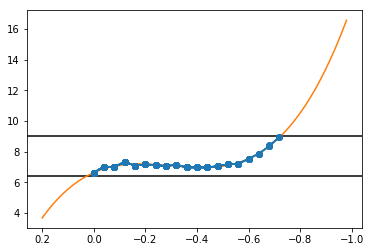

In [1]:
import importlib
from robot import Robot
from buffer import Buffer
from simulation import Simulation
from sys import argv
import matplotlib.pyplot as plt
import time
from IPython import display
import numpy as np
from input_window_and_choice_window import Windows
from computer_vision import VisionForRobot


def main(*argv):
    win = Windows()
    win.input_window()
    win.choice_window()
    goal = win.phGoal
    choice = win.choice
    if choice == "standard":
        ph_sim = 7
    elif choice == "random":
        ph_sim = random.uniform(1, 14)
    elif choice == "computervision":
        v = VisionForRobot()
        ph_sim = v.recognize_numbers()
    print("Goal = ", goal, "Choice = ", choice)

    # Initialize the simulation
    s = Simulation(pka=7, c=0.5, v=1, start=ph_sim)
    # Initialize the buffer, using the simulation
    b = Buffer(s, 4)

    # Create buffy
    buffy = Robot(goal, b)
    # Let buffy do its thing
    buffy.run()

    return buffy


buffy = main(9)

data = buffy.read_mind()

poly = buffy.b.s.poly

real_data = np.array([[x,np.polyval(poly, x)] for x in np.arange(0.2, -1.0, -0.02)])



plt.ion()

fig, ax = plt.subplots()
ax.plot(real_data[:,0],real_data[:,1], c='C1')
lim = ax.get_xlim()
ax.set_xlim(lim[1], lim[0])
x = []
y = []
ax.hlines([buffy.b.s.start, buffy.g], lim[1], lim[0])
for t, p in data:
    x.append(t)
    y.append(p)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    ax.plot(x, y, marker='o', c='C0')
    time.sleep(0.5)
plt.close()
plt.show()